In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data= pd.read_csv("Mall_Customers.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x=data.iloc[:,[3,4]].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import DBSCAN

In [9]:
clustering = DBSCAN(eps=3, min_samples=2).fit(x)

In [10]:
clustering.labels_

array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [11]:
clustering

DBSCAN(eps=3, min_samples=2)

In [12]:
supervised =pd.DataFrame(data)
supervised['cluster_group']=clustering.labels_
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [13]:

supervised.to_csv("cluster.csv",index=False)

C:\Users\rsarv\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\rsarv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


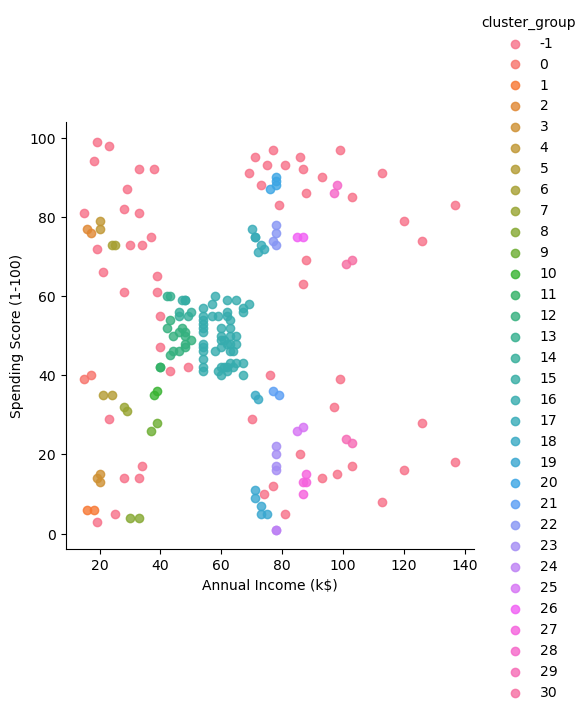

In [14]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)